<a href="https://colab.research.google.com/github/RodRBF/An-lises-Financeiras-com-Python/blob/main/An%C3%A1lise_de_Portf%C3%B3lio_Yahoo_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Benchmark com S&P500**

---
**O objetivo** do código abaixo é selecionar determinado número de ações para compor um possivel portfólio e compara-lo com o indice S&P500, utilizando a bibliotéca ***pyfolio***, a qual gera automaticamente diversos indicadores de desempenho.

In [ ]:
!pip install git+https://github.com/quantopian/pyfolio #link de correção de falhas da biblioteca original
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas_datareader as web
yf.pdr_override()
import pyfolio as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl, plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-tgys3nuz
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-tgys3nuz
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.9 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75755 sha256=c7c8a9172fdf2b8869ecdc0749e35160fc91201c0fdbe81744f2a2e5f63db919
  Stored in directory: /tmp/pip-ephem-wheel-cache-er29y4z6/wheels/25/2f/dd/558b6be9405213c9f6fdb1c5a062028a4da70862268f4116e6
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=4407c338b06c24a5c13e439c424e3f765beecdb654c40ec61074d790333cdee5
  Stored in d

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
values = ['AAPL','NVDA','GOOGL', 'NU','^GSPC']

data_yahoo = yf.download(values, start='2021-01-01', end='2024-02-27')['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [ ]:
df = data_yahoo.dropna()
rotulo = ['APPLE','GOOGLE','NUBANK','NVIDIA','S&P500']
df.columns = rotulo
df

,APPLE,GOOGLE,NUBANK,NVIDIA,S&P500
Date,,,,,
2021-12-09,172.368103,147.638504,10.33,304.480072,4667.450195
2021-12-10,177.196686,148.001495,11.85,301.564087,4712.020020
2021-12-13,173.533295,145.826508,10.81,281.222137,4668.970215
2021-12-14,172.140991,143.906998,9.92,282.979736,4634.089844
2021-12-15,177.048584,146.440994,10.01,304.170471,4709.850098
...,...,...,...,...,...
2024-02-20,181.559998,141.119995,10.26,694.520020,4975.509766
2024-02-21,182.320007,142.550003,10.09,674.719971,4981.799805
2024-02-22,184.369995,144.089996,10.36,785.380005,5087.029785


In [ ]:
# Dar "estilo" para os gráficos
# Para checar estilos -> https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

plt.style.use('seaborn')
mpl.rcParams['font.family']= 'serif'

<Axes: xlabel='Date'>

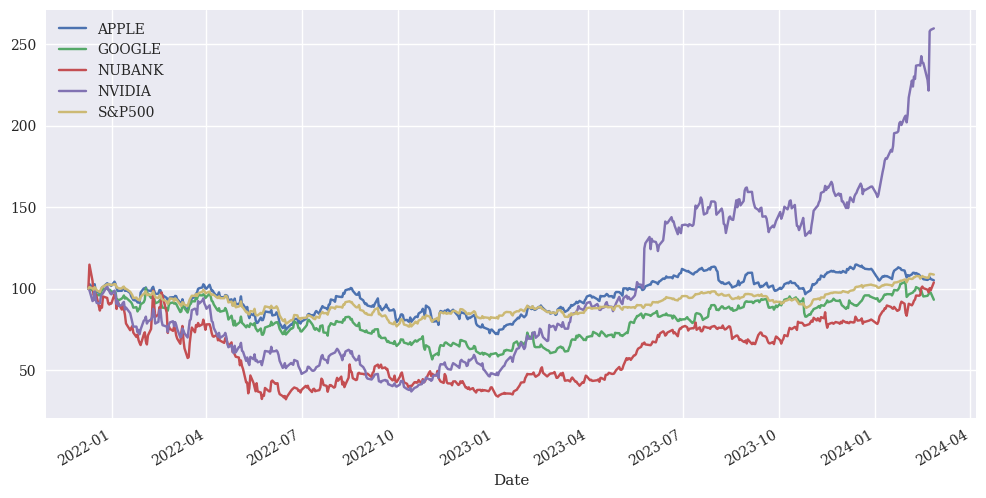

In [ ]:
prices_aj = df/df.iloc[0]*100
prices_aj
prices_aj.plot(figsize=(12,6))

In [ ]:
retorno = df.pct_change()
retorno

,APPLE,GOOGLE,NUBANK,NVIDIA,S&P500
Date,,,,,
2021-12-09,NaN,NaN,NaN,NaN,NaN
2021-12-10,0.028013,0.002459,0.147144,-0.009577,0.009549
2021-12-13,-0.020674,-0.014696,-0.087764,-0.067455,-0.009136
2021-12-14,-0.008023,-0.013163,-0.082331,0.006250,-0.007471
2021-12-15,0.028509,0.017609,0.009073,0.074884,0.016348
...,...,...,...,...,...
2024-02-20,-0.004114,0.004270,-0.009652,-0.043532,-0.006005
2024-02-21,0.004186,0.010133,-0.016569,-0.028509,0.001264
2024-02-22,0.011244,0.010803,0.026759,0.164009,0.021123


In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,APPLE,GOOGLE,NUBANK,NVIDIA,S&P500
Date,,,,,
2021-12-09,1.000000,1.000000,1.000000,1.000000,1.000000
2021-12-10,1.028013,1.002459,1.147144,0.990423,1.009549
2021-12-13,1.006760,0.987727,1.046467,0.923614,1.000326
2021-12-14,0.998682,0.974725,0.960310,0.929387,0.992853
2021-12-15,1.027154,0.991889,0.969022,0.998983,1.009084
...,...,...,...,...,...
2024-02-20,1.053327,0.955848,0.993224,2.281003,1.066002
2024-02-21,1.057736,0.965534,0.976767,2.215974,1.067349
2024-02-22,1.069629,0.975965,1.002904,2.579413,1.089895


In [ ]:
disp_carteira = 10000 #Valor dispendido para investimento em cada ação da carteira
carteira = disp_carteira * retorno_acumulado.iloc[:, :4]
carteira['Saldo'] = carteira.sum(axis=1)
carteira['Retorno'] = carteira['Saldo'].pct_change()
carteira

,APPLE,GOOGLE,NUBANK,NVIDIA,Saldo,Retorno
Date,,,,,,
2021-12-09,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000,NaN
2021-12-10,10280.132036,10024.586495,11471.442855,9904.230675,41680.392060,0.042010
2021-12-13,10067.599030,9877.268029,10464.666505,9236.142634,39645.676198,-0.048817
2021-12-14,9986.824023,9747.253850,9603.097918,9293.867229,38631.043020,-0.025593
2021-12-15,10271.539854,9918.889061,9690.222946,9989.831820,39870.483681,0.032084
...,...,...,...,...,...,...
2024-02-20,10533.271201,9558.481783,9932.236500,22810.032030,52834.021514,-0.021082
2024-02-21,10577.363452,9655.340522,9767.667209,22159.741563,52160.112746,-0.012755
2024-02-22,10696.294261,9759.648900,10029.041368,25794.134889,56279.119418,0.078969


Start date,2021-12-09
End date,2024-02-26
Total months,26
,Backtest
Annual return,16.678%
Cumulative returns,40.454%
Annual volatility,36.111%
Sharpe ratio,0.61
Calmar ratio,0.34
Stability,0.33
Max drawdown,-49.391%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,49.39,2021-12-10,2023-01-05,2023-07-13,415
1,10.31,2023-07-31,2023-10-26,2023-11-10,75
2,4.95,2024-02-14,2024-02-21,2024-02-22,7
3,4.85,2023-11-14,2023-12-04,2023-12-18,25
4,4.65,2024-01-29,2024-01-31,2024-02-02,5


Stress Events,mean,min,max
New Normal,0.09%,-6.80%,8.01%


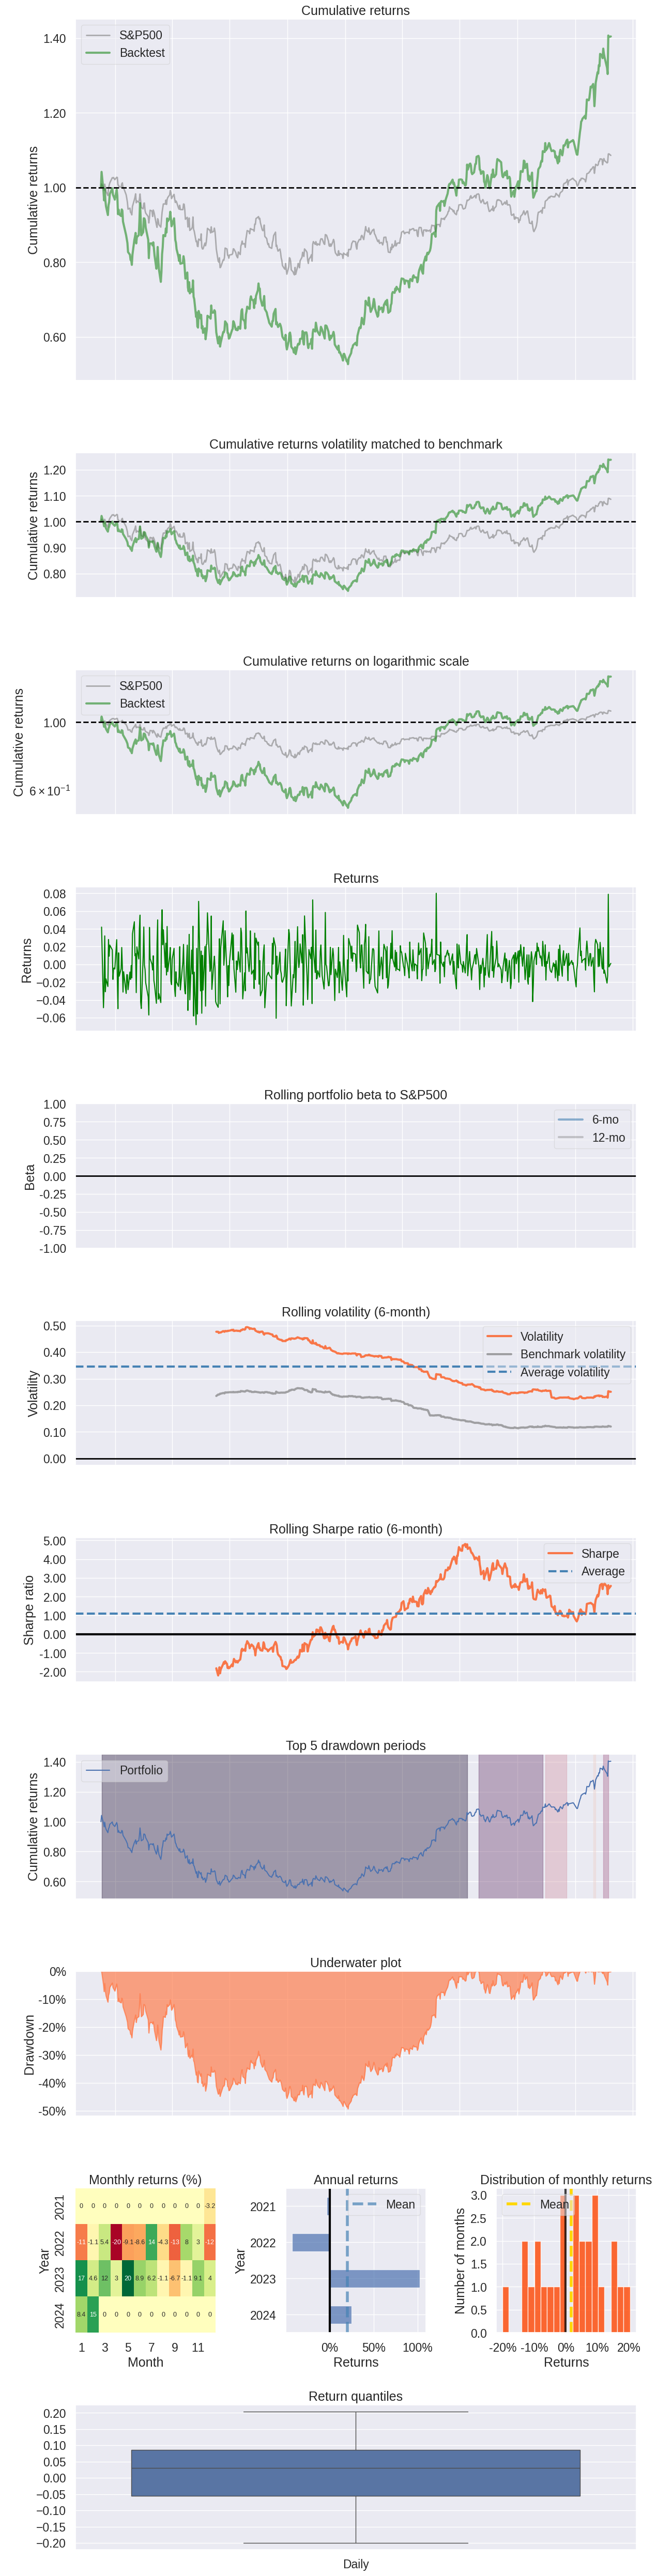

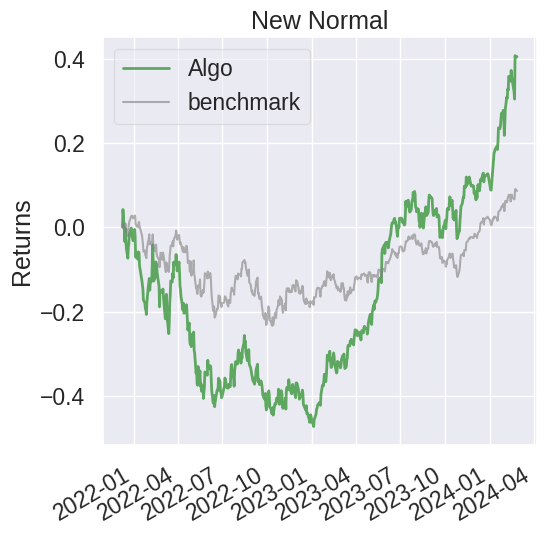

In [ ]:
pf.create_full_tear_sheet(carteira['Retorno'], benchmark_rets=retorno['S&P500'])

(1.0, 2.0)

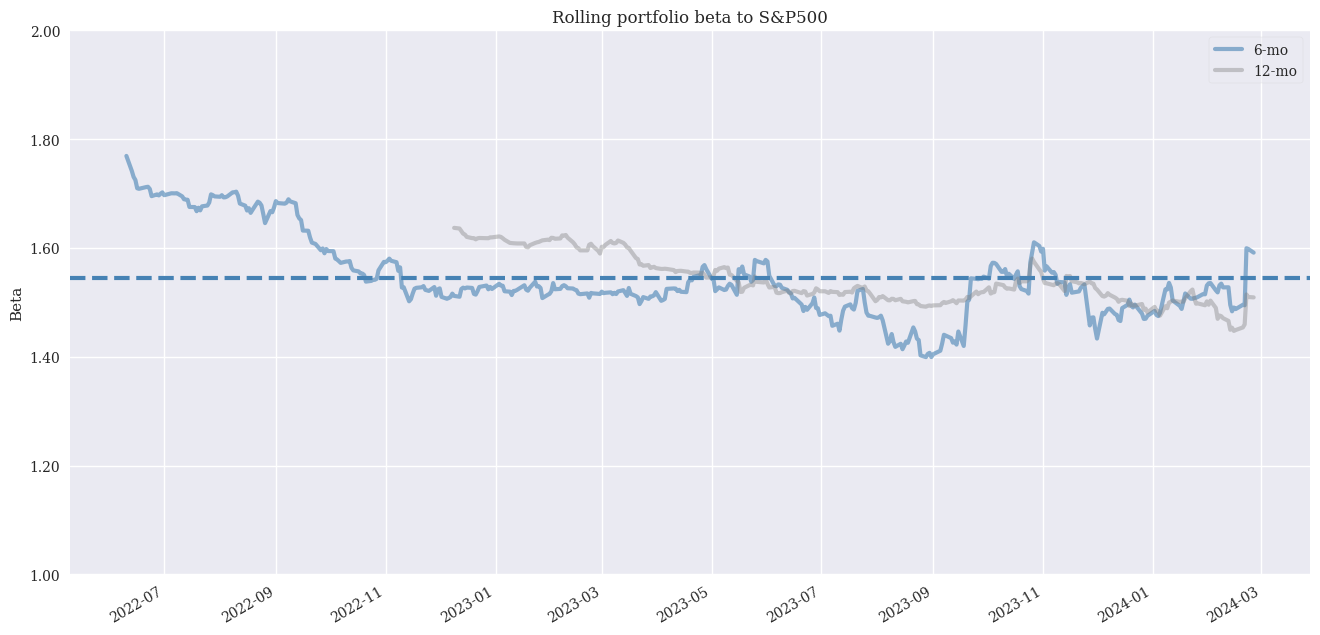

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira['Retorno'], factor_returns=retorno['S&P500'], ax=ax1)
plt.ylim((1, 2))